In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("transactions.csv")
df['txn_date'] = pd.to_datetime(df['txn_date'])
df.head()


,transaction_id,customer_id,txn_date,description,category,amount,txn_type,payment_method
0,1,101,2024-01-02,AMZN Purchase,Shopping,1200.5,debit,Card
1,2,101,2024-01-03,Salary Credit,Salary,45000.0,credit,NetBanking
2,3,101,2024-01-06,KFC Food,Food,550.0,debit,UPI
3,4,101,2024-02-01,Salary Credit,Salary,45000.0,credit,NetBanking
4,5,101,2024-02-04,Electricity Bill,Utilities,1900.5,debit,NetBanking


In [11]:
import sqlite3
conn = sqlite3.connect(":memory:")
df.to_sql("transactions", conn, index=False, if_exists="replace")


10

In [12]:
query_monthly = """
SELECT
    strftime('%Y-%m-01', txn_date) AS month,
    SUM(CASE WHEN txn_type = 'credit' THEN amount ELSE 0 END) AS total_income,
    SUM(CASE WHEN txn_type = 'debit'  THEN amount ELSE 0 END) AS total_expense
FROM transactions
GROUP BY strftime('%Y-%m-01', txn_date)
ORDER BY month;
"""

monthly = pd.read_sql_query(query_monthly, conn)
monthly


,month,total_income,total_expense
0,2024-01-01,45000.0,1750.5
1,2024-02-01,45000.0,4050.5
2,2024-03-01,45000.0,14650.0


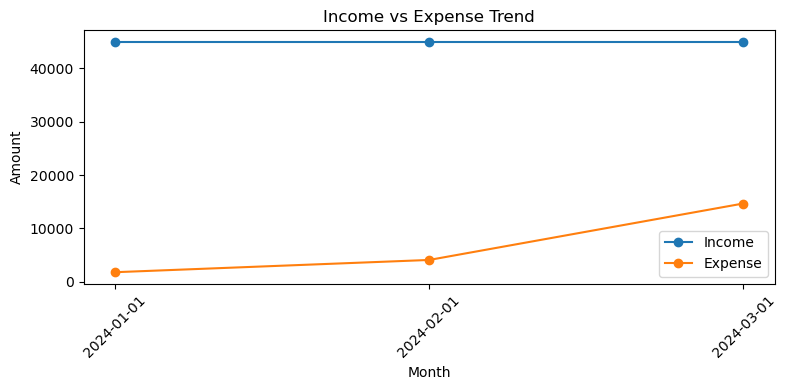

In [13]:
plt.figure(figsize=(8,4))
plt.plot(monthly['month'], monthly['total_income'], marker='o', label='Income')
plt.plot(monthly['month'], monthly['total_expense'], marker='o', label='Expense')
plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Income vs Expense Trend")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
monthly.to_csv("monthly_summary.csv", index=False)
